In [1]:
DATA_PATH = "./data/"
OUTPUT_PATH = "./out/"
OUTPUT_PATH_F = "./figures/"

In [2]:
%matplotlib inline

import os
import ast
import math
import time

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.lines as mlines

colorDic = {"blue" : "#6599FF", "yellow" : "#FFAD33",  "purple": "#683b96", "green" : "#198D6D", "red" : "#FF523F"}
colors = list(colorDic.values())

In [3]:
lst = []
for filename in os.listdir(DATA_PATH):
    if filename.endswith(".csv") and not(filename.endswith("_conditions.csv")) and  not(filename.endswith("_conditions_apple.csv")) and filename.startswith("S"): 
        #print(filename)
        i = filename.split("_")[1].split(".")[0]
        split = filename.split("bone")[0].split("click")[0].split("raw")[0]
        x = split.split("S")[1].split("U")
        x.append(i)
        lst.append(x)
    else:
        continue
dfData = pd.DataFrame(lst, columns=["S", "U", "I"]).drop_duplicates()
for c in dfData.columns:
    dfData[c] = pd.to_numeric(dfData[c])
dfData.sort_values(["S", "U"], ascending=False)

,S,U,I
2,12,24,0
25,12,23,0
34,11,22,0
0,11,21,0
9,10,20,0
29,10,19,0
1,9,18,0
11,9,17,0
8,8,16,0
3,8,15,0


In [4]:
dfApple_lst = []
for row in dfData.iterrows():
    PId = row[1].U
    if PId % 2 == 0:
        SId = row[1].S
        version = row[1].I
        apple_name = "S" + str(SId) + "_conditions_apple.csv"
        lines = open(DATA_PATH + apple_name).read().splitlines()
        apple_lst = []
        for line in lines:
            data = line.split(";")
            if len(data) > 1 and not "Rounds" in line:
                data[3] = str(data[3]) == "True"
                data[0] = int(data[0])
                apple_lst.append(data)
        dfTempApples = pd.DataFrame(apple_lst)
        dfTempApples.columns = ["Round", "Name", "Position", "Good"]
        dfTempApples["PId"] = PId
        dfTempApples["SId"] = SId
        dfApple_lst.append(dfTempApples)
dfApple_conditions = pd.concat(dfApple_lst)
dfApple_conditions.head()

,Round,Name,Position,Good,PId,SId
0,0,Apple_084,"(2.20300000, 1.53860000, 3.43800000)",True,18,9
1,0,Apple_021,"(4.07300000, 0.82759990, -0.35000000)",True,18,9
2,0,Apple_008,"(-1.68600000, 1.35260000, -3.36700000)",True,18,9
3,0,Apple_063,"(2.69100000, 0.22460000, -2.84400000)",True,18,9
4,0,Apple_091,"(-0.48800000, 2.15260000, 3.89400000)",True,18,9


In [5]:
apples_per_round = 8
dfClick_lst = []
for row in dfData.iterrows():
    PId = row[1].U
    if PId % 2 == 0:
        SId = row[1].S
        version = row[1].I
        data_name = "S" + str(SId) + "U" + str(PId) + "clickData_" + str(version) + ".csv"
        lines = open(DATA_PATH + data_name).read().splitlines()
        click_lst = []
        line_nr = 0
        for line in lines:
            if not "Cylinder" in line:
                data = line.split(";")
                if len(data) > 1 and "StudyId" not in line:
                    data[3] = data[3] == "True"
                    data[4] = data[4] == "True"
                    apple_contains = data[5] in set(dfApple_conditions[(dfApple_conditions.PId == PId) & (dfApple_conditions.Good == True) & (dfApple_conditions.Round == math.floor(line_nr / apples_per_round))].Name)
                    data.append(apple_contains)
                    #data.append(math.floor(line_nr / apples_per_round))
                    click_lst.append(data)
                    line_nr += 1
        dfTempClick = pd.DataFrame(click_lst)
        #print(click_lst)
        dfTempClick.columns = ["SId", "PId", "Time", "IsPointer", "Correction", "Apple", "Position", "ObserverPosition", "Round", "Score", "CorrectApple"]
        dfClick_lst.append(dfTempClick)
dfClick = pd.concat(dfClick_lst)
print(len(dfClick))
dfClick.Round = pd.to_numeric(dfClick.Round)
dfClick.head(20)

1152


,SId,PId,Time,IsPointer,Correction,Apple,Position,ObserverPosition,Round,Score,CorrectApple
0,9,18,1533629086232,False,True,Apple_084,"(2.14056000, 1.60657600, 3.37415900)","(0.83000000, -1.00000000, 0.00000000)",0,1,True
1,9,18,1533629103590,False,True,Apple_022,"(3.61603400, 0.45211000, -1.56116700)","(0.83000000, -1.00000000, 0.00000000)",0,1,False
2,9,18,1533629111589,False,True,Apple_072,"(-2.19788900, 1.73350500, -3.04078100)","(0.83000000, -1.00000000, 0.00000000)",0,1,False
3,9,18,1533629122311,False,True,Apple_010,"(1.65614700, 0.60448360, -3.11091700)","(0.83000000, -1.00000000, 0.00000000)",0,1,False
4,9,18,1533629131351,False,True,Apple_091,"(-0.45903540, 2.19015100, 3.81854000)","(0.83000000, -1.00000000, 0.00000000)",0,2,True
5,9,18,1533629144628,False,True,Apple_098,"(0.66017070, 2.06849700, -3.61272400)","(0.83000000, -1.00000000, 0.00000000)",0,2,False
6,9,18,1533629149904,False,True,Apple_053,"(1.25248500, 1.14958900, -3.99681800)","(0.83000000, -1.00000000, 0.00000000)",0,2,False
7,9,18,1533629159239,False,True,Apple_086,"(3.87668300, 1.68749600, 1.15195500)","(0.83000000, -1.00000000, 0.00000000)",0,3,True
8,9,18,1533629173492,False,True,Apple_091,"(-0.46302710, 2.23671600, 3.80449200)","(0.83000000, -1.00000000, 0.00000000)",1,1,True
9,9,18,1533629183088,False,True,Apple_061,"(3.49676200, 0.80445990, 1.77396300)","(0.83000000, -1.00000000, 0.00000000)",1,1,False


In [6]:
dfClick["Distance"] = 0
dfClick.loc[dfClick.ObserverPosition == "(0.46000000, -1.00000000, 0.00000000)", "Distance"] = 0.46
dfClick.loc[dfClick.ObserverPosition == "(0.83000000, -1.00000000, 0.00000000)", "Distance"] = 0.83
dfClick.loc[dfClick.ObserverPosition == "(1.20000000, -1.00000000, 0.00000000)", "Distance"] = 1.20

In [7]:
len(dfClick)/3
print("0.46m: %s" % len(dfClick[dfClick.ObserverPosition == "(0.46000000, -1.00000000, 0.00000000)"]))
print("0.83m: %s" % len(dfClick[dfClick.ObserverPosition == "(0.83000000, -1.00000000, 0.00000000)"]))
print("1.20m: %s" % len(dfClick[dfClick.ObserverPosition == "(1.20000000, -1.00000000, 0.00000000)"]))

0.46m: 384
0.83m: 384
1.20m: 384


In [8]:
print("hit: %s" % len(dfClick[dfClick.CorrectApple == True]))
print("not hit: %s" % len(dfClick[dfClick.CorrectApple == False]))

hit: 645
not hit: 507


In [9]:
dfClick["Round2"] = dfClick.Round.apply(lambda x: x-6 if x > 5 else x)

In [10]:
lst = []
for c in dfClick.Correction.unique():
    for p in dfClick.PId.unique():
        for r in dfClick.Round2.unique():
            lst.append([c,p,r])
df3 = pd.DataFrame(lst)
df3.columns = ['Correction', 'PId', 'Round2']
df3.Round2.value_counts()

5    24
4    24
3    24
2    24
1    24
0    24
Name: Round2, dtype: int64

In [11]:

lst = []
for c in dfClick.Correction.unique():
    for p in dfClick.PId.unique():
        for r2 in dfClick.Round2.unique():
            d = dfClick[(dfClick.PId == p) & (dfClick.Correction == c) & (dfClick.Round2 == r2)].Distance.mean()
            r = dfClick[(dfClick.PId == p) & (dfClick.Correction == c) & (dfClick.Round2 == r2)].Round.mean()
            lst.append([c,p,r, r2, d])
df3 = pd.DataFrame(lst)
df3.columns = ['Correction', 'PId', 'Round', 'Round2', 'Distance']


dfX = dfClick[(dfClick.CorrectApple== True)].groupby(['Correction', 'PId', 'Round', 'Round2', 'Distance']).count().CorrectApple.reset_index()

df3 = pd.merge(df3, dfX, on=['Correction', 'PId', 'Round', 'Round2', 'Distance'], how='outer')


df3.CorrectApple = df3.CorrectApple.fillna(0)

df3["Round3"] = df3.Round.apply(lambda x: 0 if x > 5 else 1)
#df3 = df3[(df3.Round2 != 0) & (df3.Round2 != 2) & (df3.Round2 != 4)]

#df3 = df3.groupby(['Correction', 'PId', "Round2"]).mean().reset_index()
#del df3['Round2']
df3.loc[df3.Round2 == 1, "Round2"] = 1
df3.loc[df3.Round2 == 2, "Round2"] = 0
df3.loc[df3.Round2 == 3, "Round2"] = 1
df3.loc[df3.Round2 == 4, "Round2"] = 0
df3.loc[df3.Round2 == 5, "Round2"] = 1

#./out/AnovaData.csv"
df3.to_csv("./out/R_AppleCount.csv", sep=",", index=False)

df3.groupby(['Distance','Correction']).CorrectApple.describe().round(1)

#df3.Round2.value_counts()

count  mean  std  min  25%  50%  75%  max
Distance Correction                                           
0.46     False        24.0   4.6  2.0  1.0  3.0  5.0  6.0  8.0
         True         24.0   4.8  1.7  2.0  3.0  5.0  6.0  8.0
0.83     False        24.0   4.4  1.9  0.0  3.8  5.0  6.0  7.0
         True         24.0   4.6  1.7  1.0  3.0  4.0  6.0  8.0
1.20     False        24.0   4.1  1.7  1.0  3.0  4.0  5.0  7.0
         True         24.0   4.3  1.6  0.0  3.8  4.5  5.2  7.0

In [12]:
hit_no_cor = len(dfClick[(dfClick.CorrectApple == True) & (dfClick.Correction == False)])
hit_cor = len(dfClick[(dfClick.CorrectApple == True) & (dfClick.Correction == True)])
mis_no_cor = len(dfClick[(dfClick.CorrectApple == False) & (dfClick.Correction == False)])
mis_cor = len(dfClick[(dfClick.CorrectApple == False) & (dfClick.Correction == True)])
print("Count correct hit with cor: %i" % hit_cor)
print("Count correct hit without cor: %i" % hit_no_cor)

print("Count correct hit with cor: %.1f %%"  % ((hit_cor / len(dfClick[dfClick.Correction == True])*100)))
print("Count correct hit without cor: %.1f %%" % ((hit_no_cor / len(dfClick[dfClick.Correction == False]))*100))

Count correct hit with cor: 330
Count correct hit without cor: 315
Count correct hit with cor: 57.3 %
Count correct hit without cor: 54.7 %


Text(0, 0.5, 'hits')

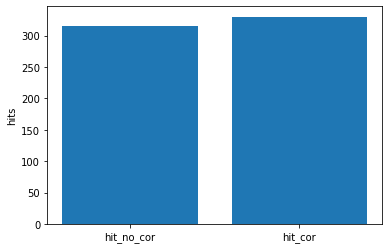

In [13]:
plt.clf()
plt.bar(range(2), [hit_no_cor, hit_cor])
plt.xticks(range(2), ["hit_no_cor", "hit_cor"])
plt.ylabel("hits")